# Content
1. Introduction
2. Credit Scoring Projects
    * Give Me Some Credit
3. 
4. Conclusion


# 1. Introduction

**Purpose of this presentationn**
* Some of ML traininng technique that's used in development, which is also used in Neural Networks or recent Deep Learning.
* Ensemble & Stacking knowledge

# 2.  Give Me Some Credit
We'll use the data from Kaggle's competition: [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit/data). This competition took place 6 years ago.

Overview
> **Improve on the state of the art in credit scoring** by predicting the probability that somebody will experience financial distress in the next two years.

Description 
> Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

> Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

> The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

### Process data

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null float64
dtypes: float64(4), int64(7)
memory usage: 16.0 MB
None


In [4]:
# Check null value
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

####  Handle missing values
Fill missing values with median.

In [4]:
# Replace missing value with median
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df.NumberOfDependents = df.NumberOfDependents.fillna(df.NumberOfDependents.median())
# Check if there's any missing value left
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [26]:
X.shape, y.shape

((150000, 10), (150000,))

### Exploratory data analysis
**Variable Name Description**
<img src="data/desc.PNG">

* **SeriousDlqin2yrs**: Deliquency in 2 years
* **NumberOfOpenCreditLinesAndLoans**: Also known as a line of credit, these loans have a maximum limit, and borrowers have the option of borrowing any amount up to that limit (or not using any of the money at all)
* **DebtRatio**: A ratio of 15% or lower is healthy and 20% or higher is considered a warning sign. Total ratio: This ratio identifies the percentage of income that goes toward paying all recurring debt payments (including mortgage, credit cards, car loans etc.) divided by GROSS income. This should be 36% or less of Gross income

**Correlation matrix**

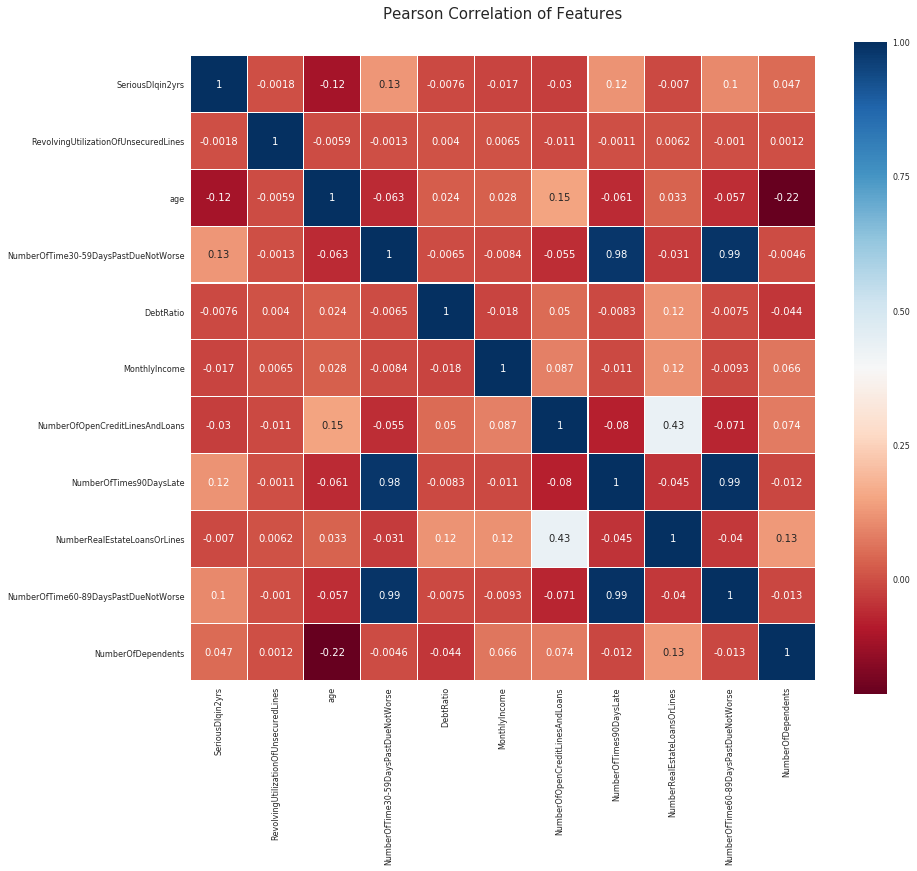

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context("paper")
%matplotlib inline
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

**Intuitions from the heat map**

* The number of dependents are lesser with age. 
* Old people seems better at managing money.
* Loans and line of credit are agreeable with real estate.
* Anyone who has been 30-59 past due tend to have more days past due and 90 days late. 

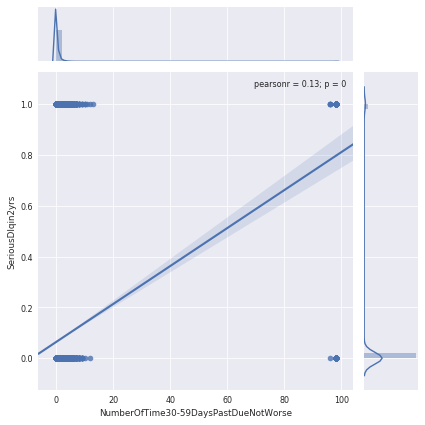

In [115]:
sns.jointplot("NumberOfTime30-59DaysPastDueNotWorse", "SeriousDlqin2yrs", 
              data=df, kind='reg');

There's significant signal of bad loan in first 30-59 days.

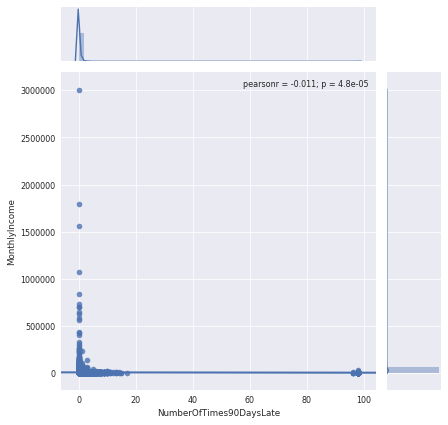

In [118]:
sns.jointplot("NumberOfTimes90DaysLate", "MonthlyIncome", 
              data=df, kind='reg');

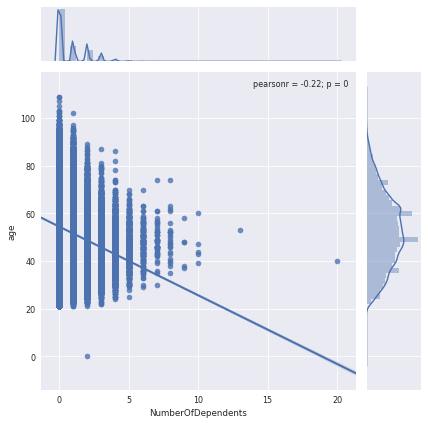

In [116]:
sns.jointplot("NumberOfDependents", "age", data=df, kind='reg');

* Low income people tends to have past due. 
* Two clusters, one very large number less than 20 times of past due and another one with more than 100 times!

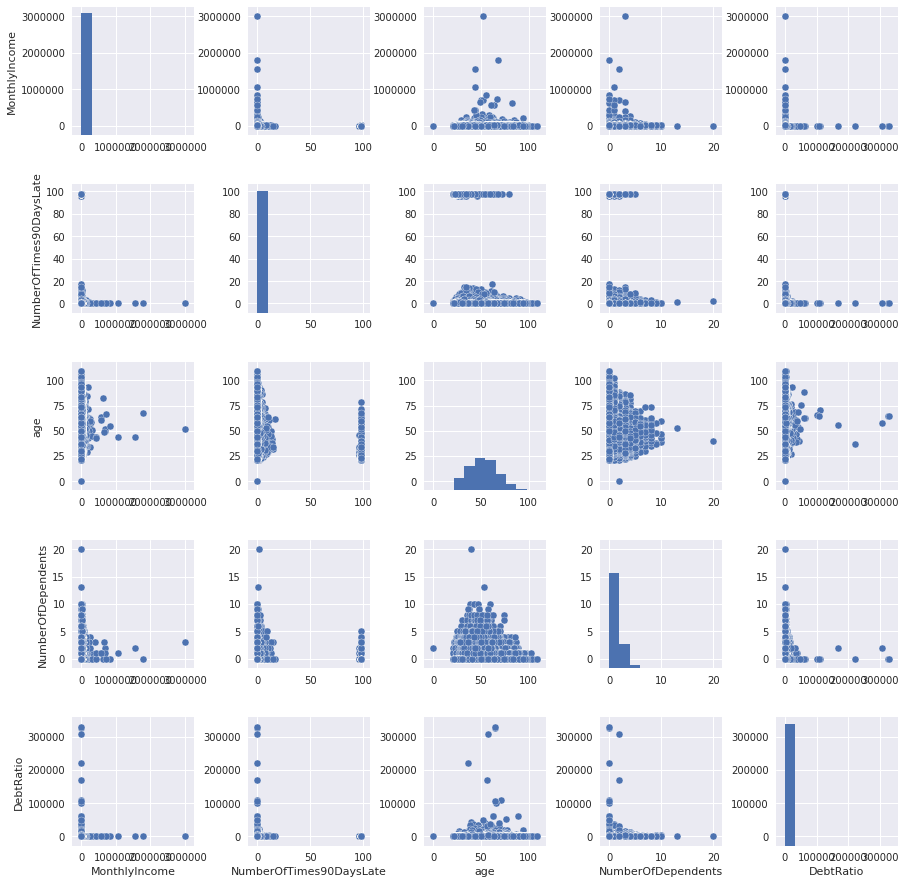

In [188]:
#scatterplot
sns.set()
cols = ['MonthlyIncome', 'NumberOfTimes90DaysLate', 
                           'age', 'NumberOfDependents', 'DebtRatio']
sns.pairplot(df[cols], size = 2.5)
plt.show();

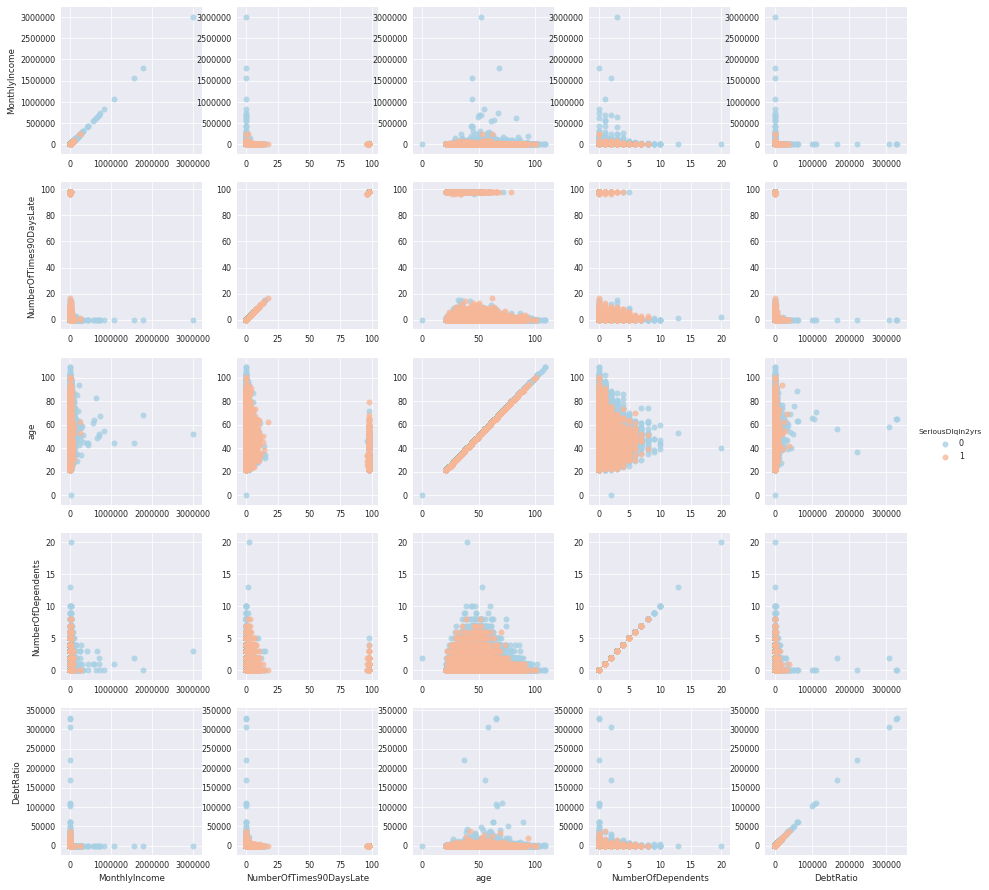

In [117]:
g = sns.PairGrid(df, vars=['MonthlyIncome', 'NumberOfTimes90DaysLate', 
                           'age', 'NumberOfDependents', 'DebtRatio'],
                 hue='SeriousDlqin2yrs', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

We can see the two clusters in **NumberOfTimes90DaysLate** clearly in this plot.

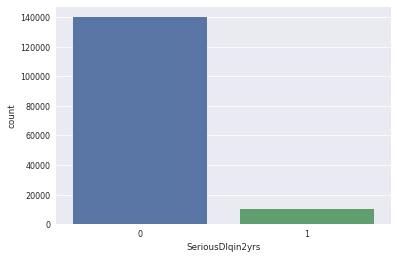

In [186]:
sns.countplot(x="SeriousDlqin2yrs", data=df);

We also plot the number of deliquency (0) and not deliquency (1).

## Modeling

In [57]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/cs-training.csv')
df.head()
df = df.drop('Unnamed: 0',axis=1)

# Replace missing value with median
df.MonthlyIncome = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df.NumberOfDependents = df.NumberOfDependents.fillna(df.NumberOfDependents.median())
X = df.drop(["SeriousDlqin2yrs"],axis=1)
y = df["SeriousDlqin2yrs"]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.3, random_state=0)

In [70]:
num_tree = 100

dt_params = {
    'max_depth':1,
    'criterion':'entropy',
    'random_state':0
}

rf_params = {
    'n_jobs': -1,
    'n_estimators': num_tree,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':num_tree,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': num_tree,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': num_tree,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [75]:
from sklearn.model_selection import cross_val_score

classifier_results = {}
def bar_plot_accuracy(results):
    cv_mean = list(map(lambda x: np.mean(x), results.values()))
    cv_std = list(map(lambda x: np.var(x), results.values()))
    cv_res = pd.DataFrame({"CrossValMeans":cv_mean,
                           "CrossValerrors":cv_std,
                           "Algorithm":list(results.keys())})
    g = sns.barplot("CrossValMeans","Algorithm", data = cv_res, 
                    palette="Set3", orient = "h",**{'xerr':cv_std})
    g.set_xlabel("Mean Accuracy")
    g = g.set_title("Cross validation scores")

def print_accuracy(results):
    for name, scores in results.items():
        print("Accuracy: %0.2f%% (+/- %0.2f%%) | %20s" 
          % (100*scores.mean(), 100*scores.std() * 2, name))

def classifiers_accuracy(classifiers, X_, y_, scoring='f1_micro',cv=10, 
                         update_clf=True):
    
    for clf in classifiers:
        # Only update classifers to re-fit again if this set True
        # Otherwise, keep it for comparison
        if not update_clf and classifier_results:
            if clf.__class__.__name__ not in classifier_results:
                scores = cross_val_score(clf, X_, y_, 
                                         scoring=scoring, cv=cv)
                classifier_results[clf.__class__.__name__] = scores
                
        else:
            scores = cross_val_score(clf, X_, y_, scoring=scoring, cv=cv)
            classifier_results[clf.__class__.__name__] = scores
            
    return classifier_results    

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

classifiers = [
    RandomForestClassifier(**rf_params),
    ExtraTreesClassifier(**et_params),
    DecisionTreeClassifier(**dt_params),
    GradientBoostingClassifier(**gb_params),
    KNeighborsClassifier(),
    AdaBoostClassifier(**ada_params),
    LogisticRegression()
]

classifiers_accuracy(classifiers, X, y, scoring='roc_auc', cv=10)
print_accuracy(classifier_results)

Accuracy: 69.37% (+/- 2.64%) |   LogisticRegression
Accuracy: 82.64% (+/- 1.36%) | ExtraTreesClassifier
Accuracy: 57.24% (+/- 0.90%) | KNeighborsClassifier
Accuracy: 86.01% (+/- 0.87%) | RandomForestClassifier
Accuracy: 86.03% (+/- 0.99%) |   AdaBoostClassifier
Accuracy: 65.58% (+/- 1.13%) | DecisionTreeClassifier
Accuracy: 86.52% (+/- 0.91%) | GradientBoostingClassifier


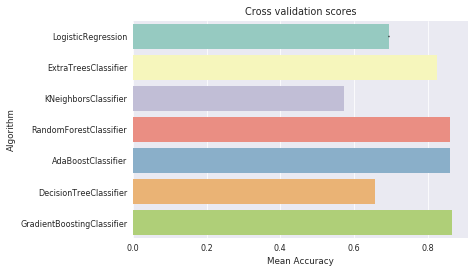

In [81]:
bar_plot_accuracy(classifier_results)

## Evaluating classifiers

**ROC curve** are frequently used to show in a graphical way the connection/trade-off between precision and recall.
* Precision = TP/(TP+FP)
    * Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives. 
* Recall = TP/(TP+FN) 
    * Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives.

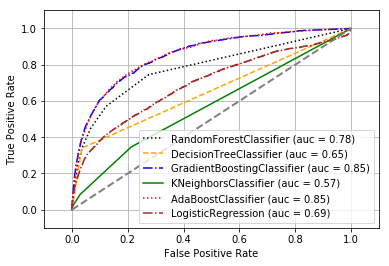

In [213]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

colors = ['black', 'orange', 'blue', 'green', 'red', 'brown']
linestyles = [':', '--', '-.', '-', ':', '-.']

classifiers = [
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    LogisticRegression()
]

for i, clf in enumerate(classifiers):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=colors[i],
             linestyle=linestyles[i],
             label='%s (auc = %0.2f)' % (clf.__class__.__name__, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

* We can see that GradientBoostingClassifier and AdaBoostClassifier are best amongst all. 
* It's theoritically suggested that an ensemble model of both can produce a better model of their own. And we will talk about this later.

### Gradient Boosting regularization
T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.
> 
Besides the size of the constituent trees, $J$, the other meta-parameter of gradient boosting is the number of boosting iterations $M$. Each iteration usually reduces the training risk $L(f_M )$, so that for $M$ large enough this risk can be made arbitrarily small. However, fitting the training data too well can lead to overfitting, which degrades the risk on future predictions. Thus, there is an optimal number $M*$ minimizing future risk that is application dependent. A convenient way to estimate $M*$ is to monitor prediction risk as a function of $M$ on a validation sample. The value of $M$ that minimizes this risk is taken to be an estimate of $M*$. This is analogous to the early stopping strategy often used with neural networks (Section 11.4).

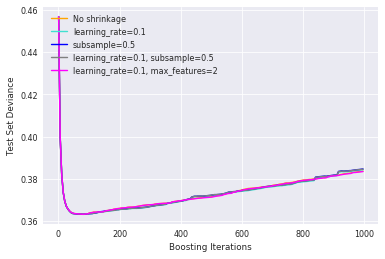

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.3, random_state=0)

gb_params = {'n_estimators': 1000, 
             'max_leaf_nodes': 4, 
             'max_depth': None, 
             'random_state': 2,
             'min_samples_split': 5}

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(gb_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**gb_params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)
    
    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

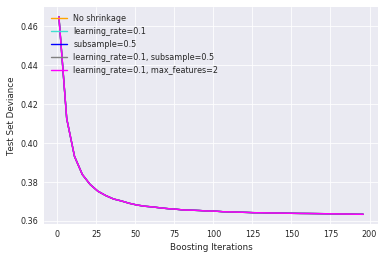

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size=0.3, random_state=0)

gb_params = {'n_estimators': 200, 
             'max_leaf_nodes': 4, 
             'max_depth': None, 
             'random_state': 2,
             'min_samples_split': 5}

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(gb_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**gb_params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)
    
    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

We need to choose num_tree < 400
### Early stopping

In [scikit](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/ensemble/gradient_boosting.py) **gradient_boosting.py/BaseGradientBoosting** 

`def fit(self, X, y, sample_weight=None, monitor=None):`

* First split into validation and test set

```python
if self.n_iter_no_change is not None:
            X, X_val, y, y_val, sample_weight, sample_weight_val = (
                train_test_split(X, y, sample_weight,
                                 random_state=self.random_state,
                                 test_size=self.validation_fraction))
```
* Check if `validation_loss` doesn't descrease after `n_iter_no_change`

```python
if monitor is not None:
    early_stopping = monitor(i, self, locals())
    if early_stopping:
        break

# We also provide an early stopping based on the score from
# validation set (X_val, y_val), if n_iter_no_change is set
if self.n_iter_no_change is not None:
    # By calling next(y_val_pred_iter), we get the predictions
    # for X_val after the addition of the current stage
    validation_loss = loss_(y_val, next(y_val_pred_iter),
                            sample_weight_val)

    # Require validation_score to be better (less) than at least
    # one of the last n_iter_no_change evaluations
    if np.any(validation_loss + self.tol < loss_history):
        loss_history[i % len(loss_history)] = validation_loss
    else:
        break

```

> tol : float, optional, default 1e-4
     Tolerance for the optimization. When the loss or score is not improving
     by at least tol for two consecutive iterations, unless `learning_rate`
     is set to 'adaptive', convergence is considered to be reached and
     training stops.
     
We can fit the entire data and scikit will do the splitting for us. 

### Hyperparameter search

In [99]:
# GB
import warnings
warnings.filterwarnings("ignore")
from sklearn.grid_search import GridSearchCV

gbDTC = GradientBoostingClassifier(n_estimators=100, random_state=7)

gb_param_grid = {"learning_rate":  
                 [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]}

gsgbDTC = GridSearchCV(gbDTC, param_grid = gb_param_grid, cv=10, 
                        scoring="f1_micro", n_jobs= 4, verbose = 1)

gsgbDTC.fit(X,y)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 18.0min
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed: 28.1min finished


In [100]:
gsgbDTC.best_score_

0.9373133333333333

In [102]:
print(gsgbDTC.best_estimator_.get_params())

{'random_state': 7, 'min_impurity_split': None, 'subsample': 1.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'verbose': 0, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'criterion': 'friedman_mse', 'presort': 'auto', 'init': None, 'max_features': None, 'max_depth': 3, 'warm_start': False, 'loss': 'deviance', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 500}


We can't improve much by tuning parameters. Let's try Ensemble & Stacking.

### Ensemble & Stacking
1. Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Breiman observed that the ensemble predictor almost always has lower prediction error than the single best base learner, although a proof was not presented in his [work](http://statistics.berkeley.edu/sites/default/files/tech-reports/367.pdf).
    * Bagging
        * Create classifers using training sets that are bootstraped (drawn with replacement) 
        * Average results for each case.

    * Boosting 
        * Sequential production of classifers
        * Each classifer tries to fix previous one's errors
  
2. Stacking or stacked generalization, is a procedure for ensemble learning where a second-level learner, or a metalearner, is trained on the output of a collection of base learners. 

Stacking is similar to bagging due to the independent training of the base learners, however there are two notable distinctions:

* stacking uses a metalearning algorithm to optimally combine the output from the base learners instead of simple averaging, as in bagging.     
* modern stacking is typically characterized by a diverse set of strong base learners, where bagging is often associated with a single, often weak, base learning algorithm.

Note that
* bagging is a special case of stacking which uses the mean as the metalearning algorithm.
* boosting utilizes an iterative, hence sequential, training approach, it does not scale as easily to big data problems.

In [86]:
from vote_classifier import MajorityVoteClassifier
import copy

classifiers = [
    GradientBoostingClassifier(**gb_params),
    AdaBoostClassifier(**ada_params),
]

cp1_classifiers = clone(classifiers)
eclf1 = MajorityVoteClassifier(classifiers=classifiers)
cp1_classifiers.append(eclf1)

classifiers_accuracy(cp1_classifiers, X, y, scoring='roc_auc', 
                     cv=10, update_clf=False)

In [87]:
print_accuracy(classifier_results)

Accuracy: 69.37% (+/- 2.64%) |   LogisticRegression
Accuracy: 82.64% (+/- 1.36%) | ExtraTreesClassifier
Accuracy: 57.24% (+/- 0.90%) | KNeighborsClassifier
Accuracy: 86.01% (+/- 0.87%) | RandomForestClassifier
Accuracy: 86.03% (+/- 0.99%) |   AdaBoostClassifier
Accuracy: 65.58% (+/- 1.13%) | DecisionTreeClassifier
Accuracy: 86.52% (+/- 0.92%) | MajorityVoteClassifier
Accuracy: 86.52% (+/- 0.91%) | GradientBoostingClassifier


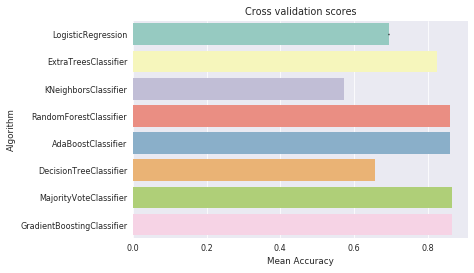

In [88]:
bar_plot_accuracy(classifier_results)

Major voting doesn't get any better.

**Soft voting**

In [90]:
from sklearn.ensemble import VotingClassifier

soft_classifiers = [
    RandomForestClassifier(**rf_params),
    ExtraTreesClassifier(**et_params),
    GradientBoostingClassifier(**gb_params),
    KNeighborsClassifier(),
    AdaBoostClassifier(**ada_params),
    LogisticRegression()
]

base_learners = [(clf.__class__.__name__,clf) for clf in soft_classifiers]
soft_voting_clf = VotingClassifier(estimators=base_learners, voting='soft')

cp2_classifiers = copy.deepcopy(soft_classifiers)
cp2_classifiers.append(soft_voting_clf)

classifiers_accuracy(cp2_classifiers, X_train, y_train, 
                     scoring='roc_auc', cv=10, update_clf=False);

In [91]:
print_accuracy(classifier_results)

Accuracy: 69.37% (+/- 2.64%) |   LogisticRegression
Accuracy: 82.64% (+/- 1.36%) | ExtraTreesClassifier
Accuracy: 57.24% (+/- 0.90%) | KNeighborsClassifier
Accuracy: 86.01% (+/- 0.87%) | RandomForestClassifier
Accuracy: 86.03% (+/- 0.99%) |   AdaBoostClassifier
Accuracy: 84.06% (+/- 1.85%) |     VotingClassifier
Accuracy: 65.58% (+/- 1.13%) | DecisionTreeClassifier
Accuracy: 86.52% (+/- 0.92%) | MajorityVoteClassifier
Accuracy: 86.52% (+/- 0.91%) | GradientBoostingClassifier


**Weight voting**

In [11]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)
]

base_learners = [(clf.__class__.__name__,clf) for clf in classifiers]
soft_voting_clf = VotingClassifier(estimators=base_learners, voting='soft',
                                   weights=[5,6,1,1,1,1])

cp_classifiers = copy.deepcopy(classifiers)
cp_classifiers.append(soft_voting_clf)

classifiers_accuracy(cp_classifiers, X_train, y_train, 
                     scoring='roc_auc', cv=10)

Accuracy: 84.76% (+/- 0.73%) |   AdaBoostClassifier
Accuracy: 68.06% (+/- 4.45%) |   LogisticRegression
Accuracy: 55.86% (+/- 1.41%) | KNeighborsClassifier
Accuracy: 82.73% (+/- 1.25%) |     VotingClassifier
Accuracy: 64.79% (+/- 1.96%) | DecisionTreeClassifier
Accuracy: 77.01% (+/- 1.77%) | RandomForestClassifier
Accuracy: 84.66% (+/- 1.06%) | GradientBoostingClassifier


Ensembling seem doesn't improve much. 

**Why ensemble doesn't work?**

In [5]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

SEED = 2
def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [6]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Scoring models.
knn                       : 0.556
gbm                       : 0.859
naive bayes               : 0.703
mlp-nn                    : 0.633
logistic                  : 0.694
random forest             : 0.774
Done.



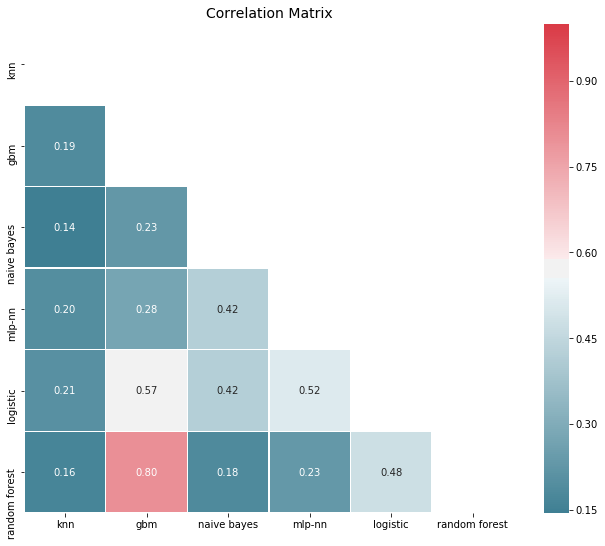

In [9]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

In reality, we need to check the correlation of class prediction.

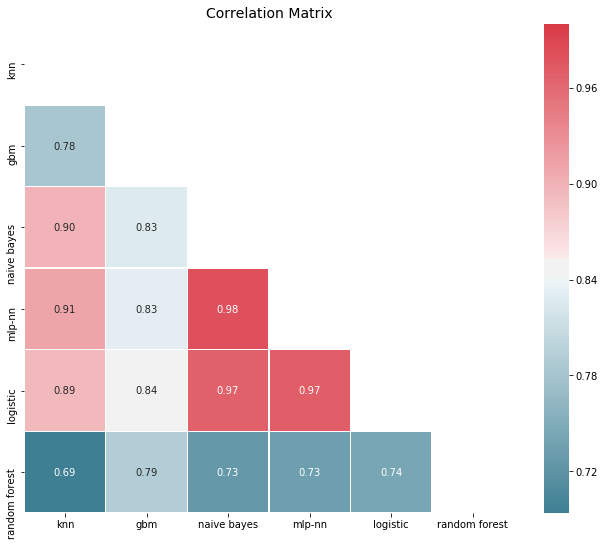

In [11]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - y_test.values).corr(), 
        inflate=False)
plt.show()

We can see that most of them have high correlation. 
We may think of using GBM and another low accuracy model which has low correlation, but this seems in vain.

In [13]:
print("Ensemble ROC-AUC score: %.3f" 
      % roc_auc_score(y_test, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.823


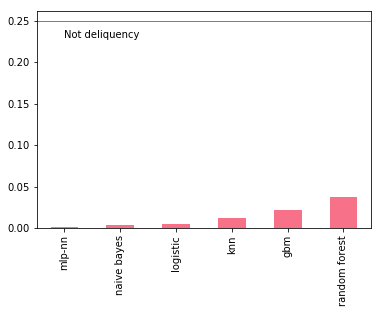

In [14]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["DEM", "REP"]
p.loc["REP", :].sort_values().plot(kind="bar")
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.23, "Not deliquency")
plt.show()

#### Stacking

In [90]:
from sklearn.model_selection import cross_val_predict
base_learners = [
    GradientBoostingClassifier(**gb_params),
    DecisionTreeClassifier(**dt_params)
]

# 1. Run CV for each base learner with training data, get a model
# 2. Generate prediction from base learner for training data

pred_results = {}
for clf in base_learners:
    predicted = cross_val_predict(clf, X_train, y_train, cv=10)
    pred_results[clf.__class__.__name__] = predicted.ravel()
    
pred_results['target'] = y_train
base_predictions_train = pd.DataFrame.from_dict(pred_results)   

In [93]:
# 3. Predict from the base learners, using many types of meta learners
X_base = base_predictions_train.drop(["target"],axis=1)
y_base = base_predictions_train["target"]
meta_clf = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=0)
scores = cross_val_score(meta_clf, X_base, y_base, 
                             scoring='f1_micro', cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%) | %20s" % 
          (100*scores.mean(), 100*scores.std() * 2, "StackingClassifer"))

Accuracy: 93.34% (+/- 0.01%) |    StackingClassifer


In [199]:
# 3. Predict from the base learners 
X_base = base_predictions_train.drop(["target"],axis=1)
y_base = base_predictions_train["target"]

meta_classifiers = [
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=10),
    DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)
]

classifiers_accuracy(meta_classifiers, X_train, y_train, 
                     scoring='roc_auc', cv=10)

Accuracy: 63.35% (+/- 1.45%) |   LogisticRegression
Accuracy: 60.21% (+/- 1.73%) | DecisionTreeClassifier
Accuracy: 62.91% (+/- 1.44%) | KNeighborsClassifier
Accuracy: 63.35% (+/- 1.45%) |   AdaBoostClassifier
Accuracy: 63.35% (+/- 1.45%) | GradientBoostingClassifier
Accuracy: 63.32% (+/- 1.45%) | RandomForestClassifier


## Conclusion
* Training models are high computation cose. It seems there's influence from Deep Learning community technique like Early Stopping has been implement in scikit-learn, we will look forward for further development in scikit-learn.

* Ensemble and Stacking have been proving popularity in Data Science, but we need to have a wise approach in order to take advantage of it.

### Creating NN models

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X = df.drop(["SeriousDlqin2yrs"],axis=1)
y = df["SeriousDlqin2yrs"]

In [9]:
#divide dataset into training set, cross validation set, and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape

((76972, 10), (24054, 10))

##### Try 1st simple model
It's important to start simple. 

We only use some of very basic techniques of Deep Learning, specifically Convolutional Neural Networks (CNNs). The reason is because we can add more complexities later. 
https://www.kaggle.com/parasjindal96/basic-deep-learning-tutorial-using-keras

In [17]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [18]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [ ]:
firstModel=getModel([10,50,1])

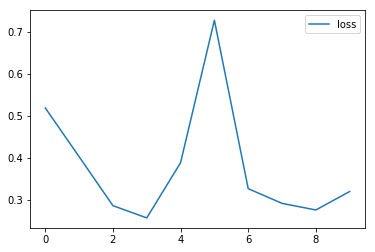

76972/76972 [==============================] - 3s 38us/step - loss: 0.3193 - acc: 0.9180 - val_loss: 0.3712 - val_acc: 0.9327


In [56]:
firstModel.fit(np.array(X_train), np.array(Y_train),
               validation_data=(np.array(X_val),np.array(Y_val)), 
               epochs=10,callbacks=[plot_losses])

##### Take a step back and ask: Are we going the right direction?
This accuracy of 0.9314 gives us a sense of trust, otherwise, there's no meaning to continue using Deep Learning here! Hey, but we haven't explained what happened, **why**?

In [42]:
scores=firstModel.evaluate(np.array(X_test),np.array(Y_test))

24054/24054 [==============================] - 0s 18us/step


In [44]:
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

Loss: 1.13779523457
Accuracy 92.9408830112


In [45]:
predY=firstModel.predict(np.array(X_test))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

### Convolution Neural Network

In [42]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.layers import Conv1D, MaxPooling1D, Input, Dense, Flatten, Embedding
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import np_utils
max_features = 10
embedding_dims = 50
input_length = 10

In [60]:
# Sequential API
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=input_length))
model.add(Conv1D(64, 5, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 50)            500       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 10, 64)            16064     
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 10, 64)            20544     
_________________________________________________________________
dropout_17 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 320)               0         
__________

In [52]:
nb_class = 2
y_train = np_utils.to_categorical(y_train, nb_class)
y_test = np_utils.to_categorical(y_test, nb_class)

In [61]:
sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                   X.as_matrix(), y.as_matrix(), test_size=0.3, random_state=0)
X_train.shape, y_train.shape

((105000, 10), (105000,))

In [92]:
# model.fit(X_train, y_train, nb_epoch=10, 
#           validation_data=(X_test, y_test), batch_size=16)

# References

* Visualization: https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* Compare ML algorithms: https://www.kaggle.com/sinakhorami/titanic-best-working-classifier
* F1-score 
    * https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
    * https://stats.stackexchange.com/questions/74158/pattern-of-roc-curve-and-choice-of-auc
    * Both P, R care about TP but
        * P = TP/(TP+FP)
            * If we don't want many **False Positives**. People who's going to be deliquent but we predict they're not.
            * Precision can be thought of as a measure of a classifiers exactness. A low precision can also indicate a large number of False Positives. 
        * R = TP/(TP+FN) 
            * If we don't want many **False Negatives**. People who's **not** going to be deliquent but we predict they're not.
            * Recall can be thought of as a measure of a classifiers completeness. A low recall indicates many False Negatives.
        * To decide which one, we need to know what has higher cost for a **False Positives** or **False Negatives**.
            * In our case, check whether if the bank can bear the risk of **False Negatives**.
    * F1 = 2PR/(P+R)
* XGBoost 
    * https://machinelearningmastery.com/configure-gradient-boosting-algorithm/    
* GBM 
    * https://henri.io/posts/using-gradient-boosting-with-early-stopping.html
    * https://machinelearningmastery.com/configure-gradient-boosting-algorithm/
    * Regularization 
        * http://scikit-learn.org/0.15/auto_examples/ensemble/plot_gradient_boosting_regularization.html
* Basic ML models 
    * https://www.kaggle.com/hugues/basic-ml-best-of-10-classifiers
    * https://www.kaggle.com/ash316/ml-from-scratch-part-2
* Ensemble 
    * https://www.dataquest.io/blog/introduction-to-ensembles/
    * https://mlwave.com/kaggle-ensembling-guide/  
    * https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
    * https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
    * http://nbviewer.jupyter.org/github/rasbt/python-machine-learning-book/blob/master/code/ch07/ch07.ipynb#Learning-with-ensembles
    * https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
   